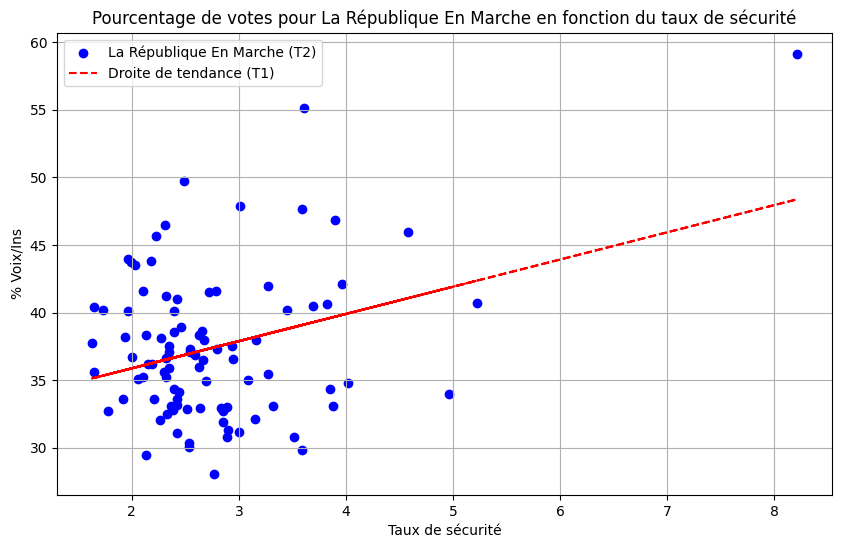

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Paramètres de connexion à la base de données PostgreSQL
conn_params = {
    "host": "localhost",
    "port": "15432", 
    "database": "postgres",
    "user": "admin",
    "password": "admin"
}

# Connexion à la base de données
conn = psycopg2.connect(**conn_params)

# Création d'un curseur pour exécuter des requêtes SQL
cur = conn.cursor()

# Requête SQL pour sélectionner les données de la table securite
query_securite = "SELECT code_postal, tauxpourcent FROM securite;"
cur.execute(query_securite)
rows_securite = cur.fetchall()

# Requête SQL pour sélectionner les données du premier tour (ou du second tour si nécessaire)
query_election = "SELECT code_postal, \"% Voix/Ins 1\", \"% Voix/Ins 2\" FROM election_2022_t2"
cur.execute(query_election)
rows_election = cur.fetchall()

# Fermeture du curseur et de la connexion à la base de données
cur.close()
conn.close()

# Création des DataFrames à partir des résultats des requêtes
df_securite = pd.DataFrame(rows_securite, columns=['code_postal', 'tauxpourcent'])
df_election = pd.DataFrame(rows_election, columns=['code_postal', '% Voix/Ins 1', '% Voix/Ins 2'])

# Fusionner les données de sécurité avec les données de l'élection sur la colonne code_postal
df_merged = pd.merge(df_securite, df_election, on='code_postal')

df_merged = df_merged.groupby('code_postal').mean().reset_index()

# Créer une colonne pour le parti politique correspondant à chaque code postal
df_merged['Parti'] = 'La République En Marche'

# Sélectionner uniquement les données pour La République En Marche
df_party = df_merged[df_merged['Parti'] == 'La République En Marche']

# Création du graphique en nuage de points
plt.figure(figsize=(10, 6))

# Nuage de points pour La République En Marche (Tour 1)
plt.scatter(df_party['tauxpourcent'], df_party['% Voix/Ins 1'], color='blue', label='La République En Marche (T2)')

# Droite de tendance (régression linéaire)
X = df_party['tauxpourcent'].values.reshape(-1, 1)
y = df_party['% Voix/Ins 1'].values
model = LinearRegression().fit(X, y)
plt.plot(X, model.predict(X), color='red', linestyle='--', label='Droite de tendance (T1)')

# Ajout des labels et du titre
plt.title('Pourcentage de votes pour La République En Marche en fonction du taux de sécurité')
plt.xlabel('Taux de sécurité')
plt.ylabel('% Voix/Ins')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()
